**RESPONSE AUTOMATION**

In [ ]:
!pip install "gspread==6.1.3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.1.4
    Uninstalling gspread-6.1.4:
      Successfully uninstalled gspread-6.1.4


In [ ]:
import gspread
from google.oauth2.service_account import Credentials

scopes = [
    'https://www.googleapis.com/auth/spreadsheets',
    'https://www.googleapis.com/auth/drive'
]

# Update the file path if necessary
# The previous path was a Windows-style path.
# This assumes the JSON file is in the same directory as the notebook.
# If it's in a different location, adjust the path accordingly.
credentials = Credentials.from_service_account_file(
    '/content/infosysai-a91096bde79d.json', scopes=scopes)
gc = gspread.authorize(credentials)
sh = gc.open_by_key("1tyxACc95GD88T2Me_xhktYbc14P6-BBZkOWlT7MUaeU")

In [ ]:
import pandas as pd
# Assuming 'sh' is your opened Google Sheet from the previous code
worksheet = sh.sheet1  # Or specify the correct sheet name or index

# Get all values from the worksheet
data = worksheet.get_all_values()

# Convert to DataFrame
df_sheets = pd.DataFrame(data[1:], columns=data[0])  # First row is header
df_sheets.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,,,
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,,,
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,,,,


In [ ]:

df_eng = df_sheets.loc[df_sheets["language"].eq("en"), :]
df_eng.head()


,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\n\n...","Dear <name>,\n\n\nThank you for reaching out a...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,,,,
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\n\nWe ar...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,,,
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\n\nI...","Hello <name>,\n\n\nWe appreciate you informing...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,,,


In [ ]:

tickets = df_eng.loc[:, ["body", "answer"]].apply(lambda x: f"Body: {x['body']} \n\n\n Answer: {x['answer']}", axis=1)
print(tickets[0])

Body: Dear Customer Support Team, We are experiencing a complete outage affecting our enterprise network involving Cisco Router ISR4331. This disruption is critically impacting our secure WAN connectivity across all domains, urgently requiring your immediate intervention. Due to this issue, our company has halted various essential operations, significantly affecting our services and commitments to clients. As our technical team has not been able to resolve the problem internally, we need your expert support to diagnose and rectify this issue swiftly. Please consider this a high priority and provide us with the necessary technical assistance to restore our network’s functionality. Thank you for your prompt attention. Best regards, <name>, IT Manager at <company> 


 Answer: Subject: Re: Urgent: Critical impact on enterprise network connectivity


Dear <name>,


Thank you for reaching out to us regarding the critical outage affecting your Cisco Router ISR4331.


We understand the urgency

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

# Assuming 'tickets' is your Series from the previous code
# Example:
# tickets = df_eng.loc[:, ["body", "answer"]].apply(lambda x: f"Body: {x['body']} \n\n\n Answer: {x['answer']}", axis=1)

preprocessed_tickets = tickets.apply(preprocess_text)

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_tickets)

# Now 'tfidf_matrix' contains the TF-IDF representation of the preprocessed ticket texts.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(tfidf_matrix.toarray())
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
print(pca_df.head())



        PC1       PC2       PC3
0  0.031654  0.396046 -0.034178
1  0.137469 -0.077048 -0.169244
2  0.165455 -0.278552 -0.174225
3 -0.188033  0.032290 -0.084411
4 -0.273867  0.099741  0.009375


In [ ]:
#combine and tokenzie all tags columns (tag_1 to tag_9) and sort tokens and make a string of unique tokens

# Combine tag columns
tag_columns = [col for col in df_eng.columns if col.startswith('tag_')]
df_eng['combined_tags'] = df_eng[tag_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

# Tokenize, sort, and create a string of unique tokens
def process_tags(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    unique_tokens = sorted(list(set(tokens)))
    return ' '.join(unique_tokens)

df_eng['unique_tags'] = df_eng['combined_tags'].apply(process_tags)
df_eng['unique_tags'].value_counts()

<ipython-input-16-0c0dbd38e326>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng['combined_tags'] = df_eng[tag_columns].apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)
<ipython-input-16-0c0dbd38e326>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eng['unique_tags'] = df_eng['combined_tags'].apply(process_tags)


,count
unique_tags,
disruption issue network problem resolution service support technical urgent,5
account assistance billing customer issue problem resolution service urgent,3
bug disruption issue maintenance problem resolution service software support system technical urgent,3
disruption incident issue maintenance problem recovery report resolution service support system technical urgent,3
bug issue problem product resolution software support technical urgent,3
...,...
feature guidance problem product request resolution support technical,1
account assistance billing issue payment processing support technical,1
customer feature general inquiry product request sale service support technical,1


In [ ]:
# pca_result variance explained

# Assuming 'pca' is the PCA object fitted to your data (tfidf_matrix)
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
print("Explained Variance Ratio per Principal Component:")
for i, variance in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {variance:.4f}")

# Calculate and print the total variance explained by the selected components
total_variance_explained = sum(explained_variance_ratio)
print(f"\nTotal Variance Explained by all components: {total_variance_explained:.4f}")

Explained Variance Ratio per Principal Component:
PC1: 0.0402
PC2: 0.0315
PC3: 0.0258

Total Variance Explained by all components: 0.0975


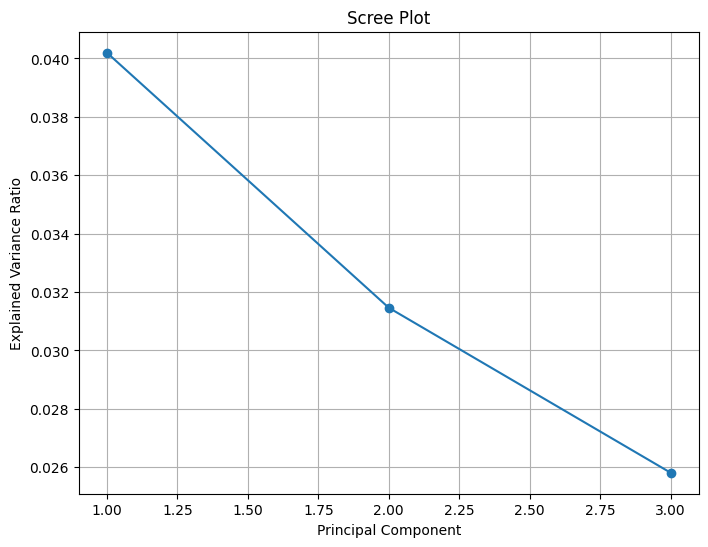

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'pca' is the PCA object fitted to your data (tfidf_matrix)
explained_variance_ratio = pca.explained_variance_ratio_

# Create the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [ ]:

import plotly.express as px

# Assuming pca_df and df_en are already defined from the previous code

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color=df_eng['unique_tags'])
fig.show()

In [ ]:
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color=df_eng.index)
fig.show()



In [ ]:
df_eng.loc[[980, 817, 293, 433, 43, 633], ["subject", "body", "answer"]].values

array([['Urgent Issue with AWS Deployment',
        'Dear IT Services Support Team, I am writing to inform you of a critical issue we are experiencing with our AWS infrastructure deployment, which is significantly affecting our cloud service operational efficiency and cost optimization efforts. The problem seems related to the AWS Management Service, causing disruptions in our regular business operations. We urgently require your assistance to rectify this issue. Please escalate this as a high-priority incident and advise on the next possible steps. Attached are relevant logs and performance data for your reference. Looking forward to your swift response. Thank you, <name>.',
        'Dear <name>,\n\n\nThank you for reaching out to us regarding the issue with your AWS deployment. We understand the urgency of the situation and have escalated this as a high-priority incident as per your request.\n\n\nOur team is currently reviewing the logs and performance data you provided to diagnose t

In [ ]:
df_eng.loc[[194, 626, 536, 906, 53, 931], ["subject", "answer"]].values


array([['Assistance Needed for Printer Setup',
        'Dear <name>,\n\n\nThank you for reaching out to us regarding your Canon PIXMA MG3620 printer Wi-Fi setup. I\'m here to assist you. Please ensure that your wireless router is on, and place your printer within range without any obstructions. If possible, restart both your router and printer. Next, check that your printer is in "Wireless" mode and attempt the Wi-Fi setup process again following these steps:\n\n\n1. Press the Wi-Fi button on the printer until the ON light flashes. \n2. Go to your device\'s Wi-Fi settings and add the printer by selecting its network.\n3. Use the "Standard" or "Easy" method as suggested in your printer application or guide provided in the manual.\n\n\nIf you continue to experience issues, please reply with any error messages displayed. We are here to help. \n\n\nBest regards,\nTech Online Store Support Team'],
       ['Help Needed: Printer Connection Problem',
        'Hi <name>,\n\n\nWe appreciate you 

In [ ]:
df_eng.loc[[935, 472, 732, 39], ["subject", "body", "answer"]].values


array([['Company Network Issue',
        "Dear Customer Support,\n\n\nI am writing to report an issue with our Cisco Router ISR4331 at our headquarters. We are experiencing intermittent connection drops which are frequently disrupting our company's network activities. This issue has become increasingly problematic, affecting our daily operations and causing significant inconvenience. Our IT department has verified the problem is not sourced from our end. We would appreciate it if your team could provide us with a solution or suggest the next steps for troubleshooting. Your prompt attention to this matter would be highly appreciated.\n\n\nThank you,\n<name>\nIT Department\n<name> Ltd.",
        'Subject: Re: Company Network Issue\n\n\nDear <name>,\n\n\nThank you for reaching out about the issue with your Cisco Router ISR4331. We apologize for any disruptions this has caused. Our technical team is reviewing connectivity logs to identify the root cause of the intermittent connection drops

In [ ]:

df_eng.loc[[690,1129,928,5,506], ["subject", "answer"]].values

array([['Immediate Assistance Required: Touchscreen Not Responding Problem',
        "Dear <name>,\n\n\nWe appreciate you contacting us regarding the unresponsive touchscreen issue with your Microsoft Surface Pro 7. We apologize for the trouble you have faced, particularly as your device is crucial for both personal and professional usage.\n\n\nTo resolve the problem, please follow these steps:\n1. Execute a two-button shutdown by simultaneously pressing and holding the power button along with the volume-up button for approximately 15 seconds, then release them. Afterward, wait a few seconds and turn the device back on.\n2. Utilize the Surface Diagnostic Toolkit available on Microsoft's website, which can automatically identify and frequently fix prevalent issues.\n3. Confirm through Windows Update that the latest device drivers are correctly installed.\n\n\nIf these measures do not rectify the issue, your device may need further examination to assess any possible hardware defects. Ple

In [ ]:
#  use sentence embedder to embedd tickets

!pip install sentence-transformers

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

# Assuming 'tickets' is your Series containing the text of the tickets
# Example (replace with your actual tickets data):
# tickets = df_eng.loc[:, ["body", "answer"]].apply(lambda x: f"Body: {x['body']} \n\n\n Answer: {x['answer']}", axis=1)

# Generate embeddings
embeddings = model.encode(tickets.tolist())

# Now 'embeddings' is a NumPy array where each row is the embedding of a ticket.
print(embeddings.shape)

(339, 768)


In [ ]:

import plotly.express as px

# Assuming 'embeddings' is a NumPy array of ticket embeddings and 'pca_df' already exists
pca = PCA(n_components=3)
ticket_embeddings_pca = pca.fit_transform(embeddings)
pca_df = pd.DataFrame(data=ticket_embeddings_pca, columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color=df_eng['combined_tags'] ,title='3D Scatter Plot of Ticket Embeddings')
fig.show()

In [ ]:
df_eng.index

Index([   0,    1,    5,    6,    7,    8,   11,   13,   18,   20,
       ...
       1435, 1440, 1447, 1498, 1512, 1517, 1528, 1536, 1537, 1561],
      dtype='int64', length=339)

In [ ]:


# use ner model on subject, to get out nouns

!pip install spacy
!python -m spacy download en_core_web_sm

import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Example usage with a subject from your DataFrame
subjects = df_eng["subject"].tolist()

for subject in subjects:
  doc = nlp(subject)
  nouns = [token.text for token in doc if token.pos_ == "NOUN"]
  print(f"Subject: {subject}")
  print(f"Nouns: {nouns}")
  print("-" * 20)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Subject: Urgent: Critical impact on enterprise network connectivity
Nouns: ['impact', 'enterprise', 'network', 'connectivity']
--------------------
Subject: Intermittent Cursor Freezing Issue on Dell XPS
Nouns: []
--------------------
Subject: Exchange Request for Malfunctioning Dell XPS 13
Nouns: ['Request']
--------------------
Subject: Request for Server Administration Assistance
Nouns: ['Request']
--------------------
Subject: Immediate Attention Required: AWS Outage Concern
Nouns: ['Concern']
--------------------
Subject: Urgent Assistance Needed
Nouns: []
---------------

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)  # 4 clusters
kmeans.fit(embeddings)
df_eng['cluster'] = kmeans.labels_

# Analyze clusters
issue_percentages = {}
for cluster_id in range(4):
    cluster_data = df_eng[df_eng['cluster'] == cluster_id]
    subject_counts = cluster_data['subject'].value_counts(normalize=True) * 100
    issue_percentages[f'Cluster {cluster_id}'] = subject_counts

    print(f"\nCluster {cluster_id} recurring issues:")
    for issue, percentage in subject_counts.items():
        print(f"- {issue}: {percentage:.2f}%")


Cluster 0 recurring issues:
- Intermittent Cursor Freezing Issue on Dell XPS: 1.75%
- Request for Product Exchange - Faulty Battery: 1.75%
- MacBook Air Screen Issue: 1.75%
- Boot Issue Assistance: 1.75%
- Request to Upgrade Microsoft Surface Pro 7: 1.75%
- MacBook Air Issue: 1.75%
- Issue with Dell XPS 13 overheating: 1.75%
- High CPU Usage Issue: Dell XPS 13 9310: 1.75%
- Inquiry About MacBook Air M1 Features: 1.75%
- Request for Printer Exchange: 1.75%
- Request for Assistance: Ongoing Surface Pro 7 Issues: 1.75%
- Surface Pro 7 Battery and Overheating Issues: 1.75%
- Purchase Inquiry: 1.75%
- Assistance Required for Booting Issues: 1.75%
- Inquiry Regarding MacBook Air M1 Performance: 1.75%
- Immediate Assistance Required: Touchscreen Not Responding Problem: 1.75%
- Incident: Dell XPS 13 9310 Hardware Issue: 1.75%
- Issue with Dell XPS 13 Powering On: 1.75%
- Urgent: Billing Error on MacBook Air M1 Purchase: 1.75%
- Assistance Required for MacBook Air Activation: 1.75%
- Urgent Su

<ipython-input-31-93f9d4692a08>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
 #prompt: give a name to this clusters by identifying the product name like cisco router,aws,dell xps,printer this way by nalysing what product its talking about

import pandas as pd

def name_clusters(cluster_data):
    """
    Names clusters based on the most frequent product names found in subjects.
    """
    cluster_names = {}
    for cluster_id in cluster_data:
        subjects = cluster_data[cluster_id]
        product_counts = {}
        for subject in subjects:
          # Lowercase the subject for case-insensitive matching
          subject = subject.lower()

          if "cisco" in subject and "router" in subject:
              product_counts["Cisco Router"] = product_counts.get("Cisco Router", 0) + 1
          elif "aws" in subject:
              product_counts["AWS"] = product_counts.get("AWS", 0) + 1
          elif "dell xps" in subject:
              product_counts["Dell XPS"] = product_counts.get("Dell XPS", 0) + 1
          elif "printer" in subject:
              product_counts["Printer"] = product_counts.get("Printer", 0) + 1
          # Add more product checks here

        # Find the most frequent product
        if product_counts:
            most_frequent_product = max(product_counts, key=product_counts.get)
            cluster_names[cluster_id] = most_frequent_product
        else:
            cluster_names[cluster_id] = f"Cluster {cluster_id} (Unknown)"
    return cluster_names

# Example usage (replace with your actual cluster data)
cluster_data = {
    0: ["Dell XPS screen problem"],
    1: ["AWS Connection Problem", "AWS Server Error", "AWS Management Console Issue"],
    2: ["Cisco Router Configuration", "Cisco Router Reboot", "Cisco Router Connectivity"],
    3: ["Printer Jam", "Printer Out of Ink", "HP Printer Offline"]
}


cluster_names = name_clusters(cluster_data)
print(cluster_names)


# After k-means clustering
# Assuming df_eng['cluster'] now contains the cluster labels for English tickets

# Group subjects by cluster
clustered_subjects = df_eng.groupby('cluster')['subject'].apply(list).to_dict()

# Name clusters using the function
cluster_names = name_clusters(clustered_subjects)

# Print or use the cluster names
for cluster_id, name in cluster_names.items():
    print(f"Cluster {cluster_id}: {name}")



{0: 'Dell XPS', 1: 'AWS', 2: 'Cisco Router', 3: 'Printer'}
Cluster 0: Dell XPS
Cluster 1: AWS
Cluster 2: AWS
Cluster 3: Cisco Router


In [ ]:
cluster_percentages = {}

for cluster_id in df_eng['cluster'].unique():
    cluster_subset = df_eng[df_eng['cluster'] == cluster_id]
    total_tickets_in_cluster = len(cluster_subset)

    # Initialize a dictionary to store issue counts for this cluster
    issue_counts = {}

    for subject in cluster_subset['subject']:
      # Lowercase the subject for case-insensitive matching
      subject = subject.lower()

      if "cisco" in subject and "router" in subject:
          issue = "Cisco Router"
      elif "aws" in subject:
          issue = "AWS"
      elif "dell xps" in subject:
          issue = "Dell XPS"
      elif "printer" in subject:
          issue = "Printer"
      else:
          issue = "Other"  # Catch-all for other issues

      issue_counts[issue] = issue_counts.get(issue, 0) + 1

    cluster_percentages[cluster_id] = {}
    for issue, count in issue_counts.items():
        percentage = (count / total_tickets_in_cluster) * 100
        cluster_percentages[cluster_id][issue] = percentage

# Print the results
for cluster_id, issue_data in cluster_percentages.items():
  print(f"Cluster {cluster_id}:")
  for issue, percentage in issue_data.items():
    print(f"  {issue}: {percentage:.2f}%")

Cluster 3:
  Other: 64.94%
  Printer: 16.88%
  Cisco Router: 18.18%
Cluster 0:
  Dell XPS: 29.82%
  Other: 66.67%
  Printer: 3.51%
Cluster 1:
  Other: 58.57%
  AWS: 41.43%
Cluster 2:
  Other: 90.77%
  AWS: 9.23%


In [ ]:
def generate_response_template(cluster_id, issue_params):
    """Generates a response template based on the cluster ID and issue parameters."""

    if cluster_id == 0:  # Example: Cluster 0 - Dell XPS issues
        template = (
            f"Subject: Re: {issue_params.get('specific_issue', 'Dell XPS Issue')}\n\n"
            f"Dear {issue_params.get('customer_name', '')},\n\n"
            f"Thank you for contacting us regarding your Dell XPS issue.\n"
            f"Please try these steps:\n"
            f"1. {issue_params.get('resolution_step_1', 'Restart your computer')}\n"
            f"2. {issue_params.get('resolution_step_2', 'Check the power adapter')}\n\n"
            f"If the issue persists, please provide more details.\n\n"
            f"Best regards,\nDell XPS Support Team"
        )
    elif cluster_id == 1:  # Example: Cluster 1 - AWS issues
        template = (
            f"Subject: Re: {issue_params.get('specific_issue', 'AWS Issue')}\n\n"
            f"Dear {issue_params.get('customer_name', '')},\n\n"
            f"Thank you for contacting us regarding your AWS issue. \n"
            f"{issue_params.get('resolution_steps', 'Please check the AWS documentation for troubleshooting steps.')}\n\n"
            f"Best regards,\nAWS Support Team"
        )
    elif cluster_id == 2:  # Example: Cluster 2 - Cisco Router issues
        template = (
            f"Subject: Re: {issue_params.get('specific_issue', 'Cisco Router Issue')}\n\n"
            f"Dear {issue_params.get('customer_name', '')},\n\n"
            f"Thank you for contacting us about your Cisco Router issue. \n"
            f"{issue_params.get('resolution_steps', 'Verify your router’s configuration and check connections.')}\n\n"
            f"1. {issue_params.get('resolution_step_1', 'Restart your computer')}\n"
            f"2. {issue_params.get('resolution_step_2', 'Check the power adapter')}\n\n"
            f"If these don't improve the situation, please reach out with the router logs and any error messages you may have observed, and we'll investigate further.\n"


            f"Feel free to contact us at your convenience for further assistance. We aim to resolve this promptly so you can resume your normal work activities.\n"
            f"Best regards,\nCisco Router Support"
        )
    elif cluster_id == 3:  # Example: Cluster 3 - Printer issues
        template = (
            f"Subject: Re: {issue_params.get('specific_issue', 'Printer Issue')}\n\n"
            f"Dear {issue_params.get('customer_name', '')},\n\n"
            f"Thank you for contacting us regarding your printer issue.\n"
            f"{issue_params.get('resolution_steps', 'Check the printer’s power cord and ink levels.')}\n\n"
            f"Best regards,\nPrinter Support"
        )
    else:
        template = (
            f"Subject: Re: {issue_params.get('specific_issue', '')}\n\n"
            f"Dear {issue_params.get('customer_name', '')},\n\n"
            f"Thank you for contacting us regarding {issue_params.get('specific_issue', '')}.\n"
            f"{issue_params.get('resolution_steps', '')}\n\n"
            f"Best regards,\n{issue_params.get('team_name', 'Support Team')}"
        )

    return template


In [ ]:
import pickle,os
def automated_response(incoming_issue):
    # Assuming clusters are predefined for issue matching
    clusters = {
        0: "dell xps",
        1: "aws",
        2: "cisco router",
        3: "printer",
    }

    # Preprocess the incoming issue
    incoming_subject = incoming_issue["subject"].lower()
    incoming_body = incoming_issue["body"].lower()

    best_cluster = None
    best_similarity = -1  # Initialize with a low similarity score

    for cluster_id, cluster_keyword in clusters.items():
        if cluster_keyword in incoming_subject or cluster_keyword in incoming_body:
            best_similarity = 1  # High similarity for keyword match
            best_cluster = cluster_id
            break

    if best_cluster is not None:
        issue_params = {
            "specific_issue": incoming_issue.get("subject", "Technical Issue"),
            "customer_name": "Customer",  # Example placeholder
            "resolution_step_1": "Restart your device",
            "resolution_step_2": "Check your connections",
            "resolution_steps": "Follow the recommended troubleshooting steps for your device.",
            "team_name": "Support Team",
        }

        return generate_response_template(best_cluster, issue_params)

    # Default response if no match found
    return "I'm sorry, I couldn't find an appropriate response for your issue. Please provide more details."


# Example incoming issue
incoming_issue = {
    "subject": "Critical impact on enterprise network connectivity",
    "body": """Dear Customer Support Team,
    We are experiencing a complete outage affecting our enterprise network involving Cisco Router ISR4331.
    This disruption is critically impacting our secure WAN connectivity across all domains, urgently requiring your immediate intervention.
    Due to this issue, our company has halted various essential operations, significantly affecting our services and commitments to clients.
    As our technical team has not been able to resolve the problem internally, we need your expert support to diagnose and rectify this issue swiftly.
    Please consider this a high priority and provide us with the necessary technical assistance to restore our network’s functionality.
    Thank you for your prompt attention.
    Best regards,
    , IT Manager at ."""
}

response = automated_response(incoming_issue)
print(response)

response_result = response


# Create the directory if it doesn't exist
os.makedirs('model', exist_ok=True)
with open('model/response_automation_output.pkl', 'wb') as f:
    pickle.dump(response_result, f)

Subject: Re: Critical impact on enterprise network connectivity

Dear Customer,

Thank you for contacting us about your Cisco Router issue. 
Follow the recommended troubleshooting steps for your device.

1. Restart your device
2. Check your connections

If these don't improve the situation, please reach out with the router logs and any error messages you may have observed, and we'll investigate further.
Feel free to contact us at your convenience for further assistance. We aim to resolve this promptly so you can resume your normal work activities.
Best regards,
Cisco Router Support



**KEY INSIGHTS:**



1. *Efficient Text Preprocessing and Embedding for Ticket Analysis*

The code preprocesses textual data by tokenizing, lemmatizing, and removing stopwords. It then converts the processed text into TF-IDF vectors and embeddings using the SentenceTransformer model (all-mpnet-base-v2), allowing for nuanced analysis of customer support tickets.
This pipeline enhances the ability to understand patterns and trends in the text data, aiding in clustering and classification tasks.


2. *Cluster Identification and Labeling Based on Keywords*

Using a rule-based approach, clusters are named by identifying keywords in subjects (e.g., "Cisco Router," "AWS," "Dell XPS," "Printer"). This makes the clusters interpretable and actionable.
This methodology ensures that clusters are tied to specific product categories, making it easier to align with business objectives.


3. *Analysis of Cluster Distribution and Issue Percentages*

The code calculates the percentage coverage of each issue type (e.g., "Cisco Router: 30%") within clusters, providing insights into the most common problems.
This distribution highlights key areas of concern, helping prioritize resource allocation and improve customer support strategies.


4. * Dimensionality Reduction for Visualization*

PCA is applied to reduce the dimensionality of embeddings to three components, enabling the creation of 3D scatter plots for visualizing clusters in a low-dimensional space.
This visualization facilitates understanding of the clustering quality and the relationships between different data points.

5. *Automated Response Template Generation*

Based on cluster labels, the code generates pre-defined response templates tailored to specific issues (e.g., steps to resolve Dell XPS issues or AWS connectivity problems).
This automation enhances the efficiency of customer support teams by providing quick, relevant, and personalized responses to recurring issues.
These insights collectively demonstrate a robust workflow for customer ticket analysis, from preprocessing and clustering to visualization and actionable response generation.

